In [1]:
import pandas as pd

Для даної задачі було обрано невеликий датасет з відкритих даних. Джерело: [TKH96a](http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/ref.html#TKH96a)

In [2]:
data = pd.read_csv('./fourclass_scale.csv', delimiter=" ", header=None)

In [3]:
data.info()  # Виводимо коротке резюме по датасету

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       862 non-null    int64  
 1   1       862 non-null    object 
 2   2       855 non-null    object 
 3   3       0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 27.1+ KB


In [4]:
data.head()  # Виводимо перші 5 значень датасету

,0,1,2,3
0,-1,1:0.747253,2:0.894737,NaN
1,1,1:0.692308,2:-0.824561,NaN
2,-1,1:0.472527,2:-0.0643275,NaN
3,-1,1:0.362637,2:0.789474,NaN
4,1,1:0.769231,2:-0.321637,NaN


In [5]:
data[3].value_counts()  # Виводимо унікальні значення та їх кількість з колонки 3

Series([], Name: count, dtype: int64)

<i>Примітка:</i><br/><br/>
Функції, що були використані вище, надають змогу швидко проаналізувати дані: дізнатись загальну кількість даних, кількість пошкоджених та формат, в якому вони представлені. <br/><br/>
Як ми бачимо з <i>info()</i>: <br/>
• Колонка <b>0</b> - це наші виходи (<i>англ.</i> labels)<br/>
• Колонки <b>1</b> та <b>2</b> мають тип object, що свідчить про необхідний подальший аналіз значень <br/>
• У колонці <b>2</b> відсутні 7 значень <br/>
• Колонка <b>3</b> зовсім порожня. <br/><br/>
Але при використанні функції <i>head()</i> ми можемо побачити, що дані у <b>1</b> та <b>2</b> вимагають обробки, а колонка <b>3</b> - шум. У чому ми переконуємося за допомогою функції <i>value_counts()</i>.

In [6]:
# Перейменовуємо колонки для кращого сприйняття
data.rename(columns={0: 'Labels', 1: 'Feature_1',
                     2: 'Feature_2', 3: 'Noise'}, inplace=True)

In [7]:
data.columns # Перевіряємо нові назви колонок у датасеті

Index(['Labels', 'Feature_1', 'Feature_2', 'Noise'], dtype='object')

In [8]:
# Замінюємо порожні значення у Feature_2 на '2:0'
data['Feature_2'] = data['Feature_2'].fillna('2:0')

# Використовуючи "слайсинг" обираємо всі колонки та лише ті рядки,
# які є непорожніми
data = data.loc[pd.notnull(data['Feature_2']), :]

In [9]:
data.drop('Noise', axis=1, inplace=True)  # Видаляємо колонку з шумом

In [10]:
# Використовуючи lambda-функцію, змінюємо значення у колонках 1 та 2.
# Наприклад, 1:0.747253 --> стає 0.747253
data['Feature_1'] = data['Feature_1'].apply(lambda x: x[2:])
data['Feature_2'] = data['Feature_2'].apply(lambda x: x[2:])

In [11]:
# Переводимо значення колонок з формату object у числовий
data['Feature_1'] = pd.to_numeric(data['Feature_1'])
data['Feature_2'] = pd.to_numeric(data['Feature_2'])

За допомогою бібліотеки numpy ми з легкістю можемо звести наші датафрейми до матричного вигляду і з легкістю їх використовувати на подальших кроках

In [12]:
import numpy as np

In [13]:
X = data[['Feature_1', 'Feature_2']].values
y = np.array(data['Labels'])

Для кращого уявлення про наші дані спробуємо їх візуалізувати за допомогою бібліотеки matplotlib

In [14]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

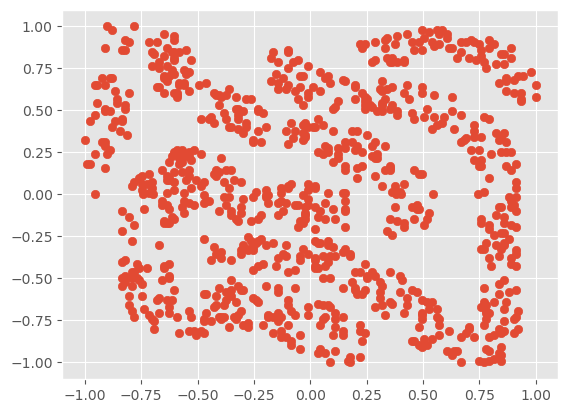

In [15]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

З підготовкою даних закінчено, тому можна переходити до наступної частини і тренувати наш класифікатор. Для цього будемо використовувати бібліотку scikit-learn та алгоритм SVM

In [16]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [17]:
# Задаємо функцію для візуалізації наших результатів
def visualization(titles, models):
    # Задаємо крок для побудови сітки
    h = .02

    # Створюємо сітку для візуалізації
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    for i, clf in enumerate(models):
        # Візуалізуємо границю рішень. Будемо помічати кольором кожну точку
        # сітки [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Зображуємо результат на кольоровому графіку
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Візуалізуємо точки тренувальної вибірки
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

In [18]:
C = 1.0  # параметр регулярізації SVM

<i>Примітка:</i><br/><br/> С - є оцінкою наскільки "сильно" ви хочете належним чином класифікувати. На варто перейматися на даному етапі про значення велечини C. Машинне навчання є досить експерементальною сферою. Тому існує багато суперечок про значення C, а також його розрахунок. Отже, ми будемо вважати, що С=1.0 на даний момент, що є хорошим параметром за замовчуванням.

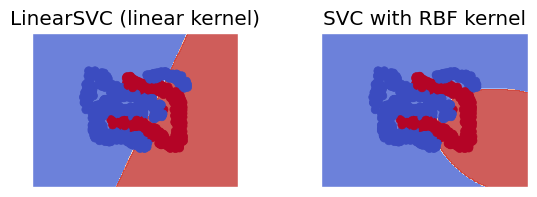

In [19]:
# Визначаємо параметри наших моделей та тренуємо їх
lin_svc = svm.LinearSVC(C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(X, y)

# Список з назвами візуалізацій
titles = ['LinearSVC (linear kernel)',
          'SVC with RBF kernel']
# Список моделей
models = [lin_svc, rbf_svc]

visualization(titles, models)

#### Завдання 1

Спробувати ще лінійне та поліноміальне стандартні ядра (<i>англ.</i> kernels) у SVC. Доповнити списки titles та models і візуалізувати моделі.

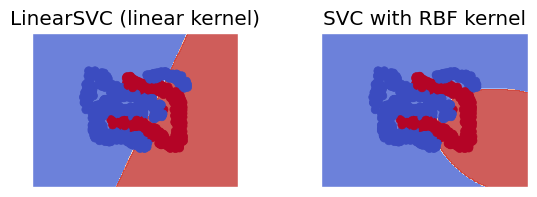

In [20]:
################ Доповніть та розкоментуйте код ################
# titles = ['LinearSVC (linear kernel)', 'SVC with RBF kernel', ]
# models = [lin_svc, rbf_svc, ]
################################################################

visualization(titles, models)

Ми навчилися препроцесити дані, візуалізовувати їх і навчати класифікатор. Залишилось дізнаватися наскільки влучними були наші дії і наскільки вдалою є наша модель. <br/><br/>Для цього поділимо нашу вибірку на тренувальну, на якій будемо навчати наш класифікатор, і тестувальну, для якої будемо прогнозувати результат.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=2)

In [22]:
clf = svm.LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ("Accuracy score: %f" % accuracy_score(y_test, y_pred))

Accuracy score: 0.734104


#### Завдання 2

Використовуючи метрики у <i>sklearn</i>, вивести значення precision та recall. <br/>
P.S Для цього потрібно підключити необхідні модулі

In [23]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.6451612903225806
Recall: 0.625


#### Завдання 3

Спробувати різні ядра у svm.SVC() та змінити основні параметри, такі як gamma, degree тощо. Яке ядро краще за все підходить для вирішення данної задачі? <br/>
P.S Не забувайте про перенавчання!

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=2
)

models = [
    ("SVC linear", svm.SVC(kernel="linear", C=1.0)),
    ("SVC rbf, gamma=0.5", svm.SVC(kernel="rbf", C=1.0, gamma=0.5)),
    ("SVC rbf, gamma=2", svm.SVC(kernel="rbf", C=1.0, gamma=2)),
    ("SVC poly, degree=3", svm.SVC(kernel="poly", C=1.0, degree=3, gamma="auto")),
    ("SVC poly, degree=5", svm.SVC(kernel="poly", C=1.0, degree=5, gamma="auto")),
]

for name, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, pos_label=1)
    rec = recall_score(y_test, y_pred, pos_label=1)

    print(name)
    print("  Accuracy:  %.3f" % acc)
    print("  Precision: %.3f" % prec)
    print("  Recall:    %.3f" % rec)
    print("-" * 30)

SVC linear
  Accuracy:  0.757
  Precision: 0.712
  Recall:    0.578
------------------------------
SVC rbf, gamma=0.5
  Accuracy:  0.775
  Precision: 0.821
  Recall:    0.500
------------------------------
SVC rbf, gamma=2
  Accuracy:  0.983
  Precision: 0.955
  Recall:    1.000
------------------------------
SVC poly, degree=3
  Accuracy:  0.751
  Precision: 1.000
  Recall:    0.328
------------------------------
SVC poly, degree=5
  Accuracy:  0.705
  Precision: 1.000
  Recall:    0.203
------------------------------


#### Завдання 4

Доповнити попередню обробку датасету так, щоб усі порожні значення було замінено на 0, та отримати значення accuracy, precision, recall на SVC з <i>rbf</i> ядром, C=1.0 та gamma=2

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=2
)

svc_rbf = SVC(kernel='rbf', C=1.0, gamma=2)
svc_rbf.fit(X_train, y_train)

y_pred = svc_rbf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)

Accuracy: 0.9826589595375722
Precision: 0.9552238805970149
Recall: 1.0
